Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
1st Semester | AY 2024-2025
<hr> | <hr>
<u>**ACTIVITY NO. 3** | **Basic I/O Scripting, Part 2**
**Name** | Vista, Jens Liam P.
**Section** | CPE32S3
**Date Performed**: | 21/02/2025
**Date Submitted**: | 21/02/2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to allow students to perform face detection on still images and videos using Haar cascades.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize OpenCV to detect faces in still images and videos.
* Demonstrate the use of Haar-like features for detection of other human features.

## 3. Procedures and Outputs

Contrary to initial assumptions, conducting face detection on a static image and a video stream shares a remarkable similarity. Essentially, the latter is merely a sequential rendition of the former: when detecting faces in videos, it essentially involves applying face detection to every individual frame obtained from the camera feed. Of course, video face detection introduces additional elements like tracking, which aren't relevant to static images. Nevertheless, it's valuable to recognize that the fundamental principles behind both processes remain consistent.

### Performing face detection on still image

The first and most basic way to perform face detection is to load an image and detect faces in it. To make the result visually meaningful, we will draw rectangles around faces on the original image.

**Before implementing the code below**, check the contents of the `cv2.CascadeClassifier()` function. Provide an explanation of the function, its parameters before running the code below.

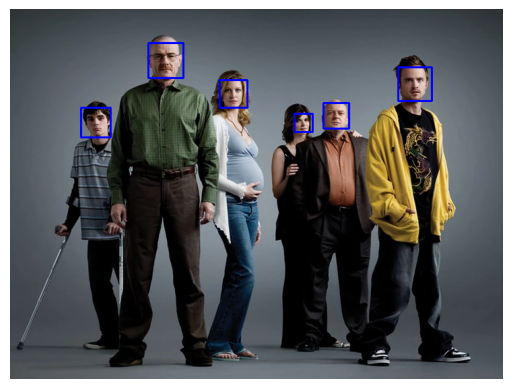

In [24]:
# Make sure that for this activity, you have downloaded the
# file indicated below from the resource linked in the instructional materials
# in the module.
from matplotlib import pyplot as plt
import cv2

image_path  = 'breaking_bad.jpg'
haar_path  = 'haarcascade_frontalface_default.xml'

def detect_faces(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)  # Improves contrast for better detection

    # Face detection with optimized parameters
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.10, minNeighbors=6, minSize=(20, 20))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 2)

    # Display output
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

detect_faces(image_path)


**Analysis**:
- Based on your earlier analysis, where do you think the face detection works in the line of code above?
- Provide an analysis of the parameters of the `detectMultiScale` method.
- Change the color of the border of the detected faces to red.
- Are you able to make the borders thicker? Demonstrate.

In [8]:
# Based on your earlier analysis, where do you think the face detection works in the line of code above?
- faces = face_cascade.detectMultiScale(gray, 1.3, 5)
# Provide an analysis of the parameters of the detectMultiScale method.
- image: Grayscale input.
- scaleFactor: Shrinks the image at each step for multi-size detection.
- minNeighbors: Filters detections; higher values reduce false positives.
- minSize & maxSize: Set the smallest and largest detectable objects.
# Change the color of the border of the detected faces to red.    

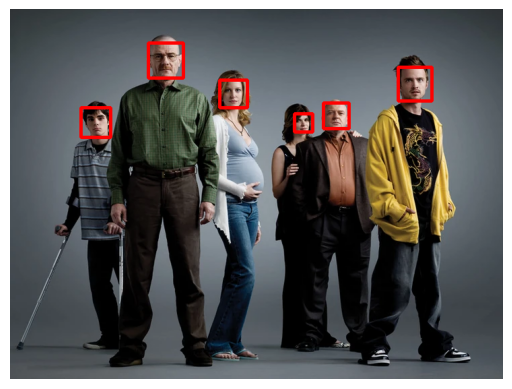

In [25]:
def detect_faces(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)  # Improves contrast for better detection

    # Face detection with optimized parameters
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.10, minNeighbors=6, minSize=(20, 20))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 3)  # Red box

    # Display output
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

detect_faces(image_path)

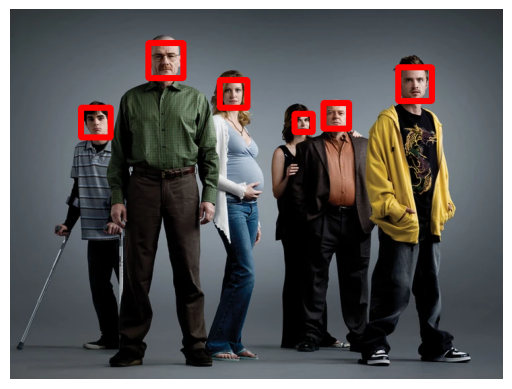

In [26]:
#Are you able to make the borders thicker? Demonstrate.
def detect_faces(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.equalizeHist(gray)  # Improves contrast for better detection

    # Face detection with optimized parameters
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.10, minNeighbors=6, minSize=(20, 20))

    # Draw rectangles around detected faces
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,0,255), 8) # line changed

    # Display output
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

detect_faces(image_path)

### Performing face detection on video

**Step 1**: Create a file called face_detection.py and include the following codes.

In [33]:
import cv2

**Step 2:** After this, we declare a method, `detect()`, which will perform face detection.

In [34]:
def detect():
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
  camera = cv2.VideoCapture(0)

**Step 3:** The first thing we need to do inside the detect() method is to load the Haar cascade files so that OpenCV can operate face detection. As we copied
the cascade files in the local `cascades/` folder, we can use a relative path. Then, we open a VideoCapture object (the camera feed). The VideoCapture  constructor takes a parameter, which indicates the camera to be used; zero indicates the first camera available.

In [ ]:
  while (True):
    ret, frame = camera.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

**Step 4:** Next up, we capture a frame. The read() method returns two values: a Boolean indicating the success of the frame read operation, and the frame
itself. We capture the frame, and then we convert it to grayscale. This is a necessary operation, because face detection in OpenCV happens in the grayscale color space:

In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

**Step 5:** Much like the single still image example, we call detectMultiScale on the grayscale version of the frame.

In [ ]:
  for (x,y,w,h) in faces:
    img = cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray, 1.03,
    5, 0, (40,40))

**Step 6:** Here we have a further step compared to the still image example: we create a region of interest corresponding to the face rectangle, and within this rectangle, we operate "eye detection". This makes sense as you wouldn't want to go looking for eyes outside a face (well, for human beings at least!).

In [ ]:
  for (ex,ey,ew,eh) in eyes:
    cv2.rectangle(img,(ex,ey),(ex+ew,ey+eh),
    (0,255,0),2)

**Step 7:** Again, we loop through the resulting eye tuples and draw green rectangles around them.

In [ ]:

    cv2.imshow("camera", frame)
    if cv2.waitKey(1000 / 12) & 0xff == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
detect()

**Provide the following**:
- Screenshot of the output for the working code once you've put it all together.
- Summary of the steps you've performed along with observations.

In [36]:
import cv2

def detect():
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")
    camera = cv2.VideoCapture(0)

    while True:
        ret, frame = camera.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            # drawing rectangle around the face
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            # for eyes
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = frame[y:y + h, x:x + w]
            # detect eyes
            eyes = eye_cascade.detectMultiScale(roi_gray, 1.03, 5, 0, (40, 40))
            for (ex, ey, ew, eh) in eyes:
                # drawrectangle on eyes
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        # show camera
        cv2.imshow("camera", frame)

        # q to quit
        if cv2.waitKey(1000 // 12) & 0xFF == ord('q'):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    detect()

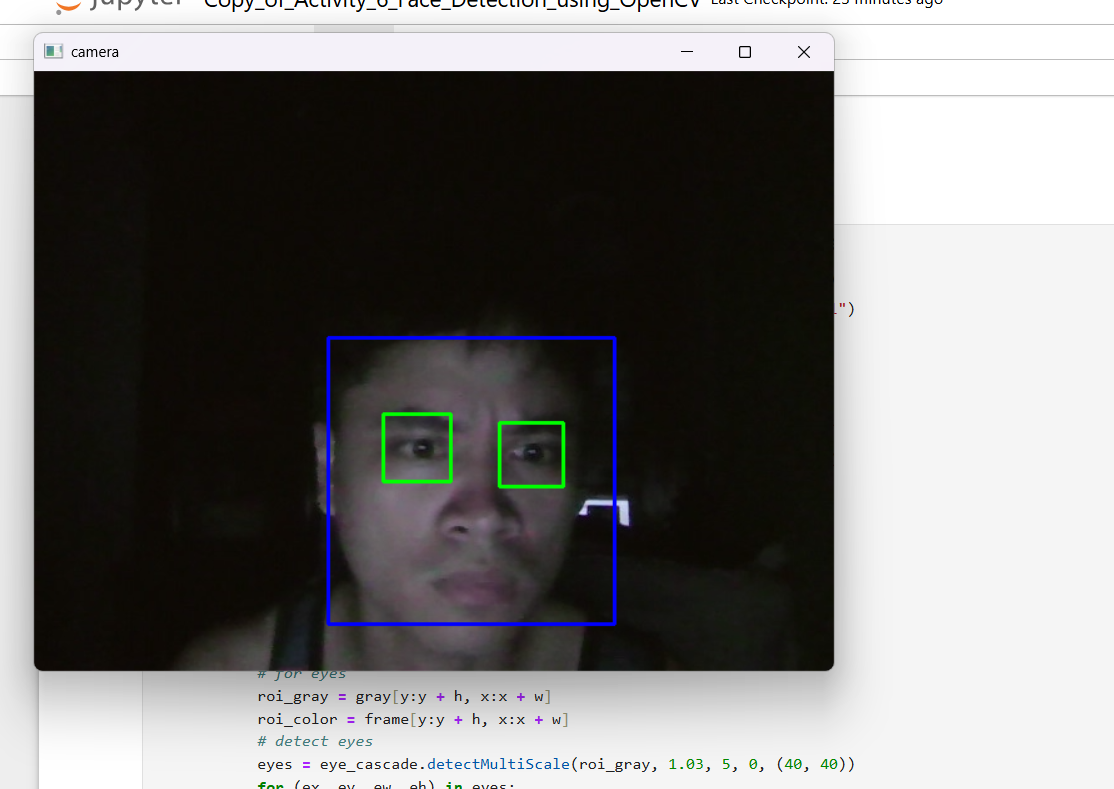


## 4. Supplementary Activity

In your Cameo project, include real-time face detection using Haar cascade. Show screenshots of the working demonstration for this supplementary activity.

Additionally, implement similar steps to detect a smile using Haar cascades.

In [37]:
import cv2

def smile_detect():
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    smile_cascade = cv2.CascadeClassifier("haarcascade_smile.xml")
    camera = cv2.VideoCapture(0)

    if not camera.isOpened():
        print("Error: Could not access the camera.")
        return

    while True:
        ret, frame = camera.read()
        if not ret:
            break
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle for face
            face_roi_gray = gray[y:y+h, x:x+w]
            face_roi_color = frame[y:y+h, x:x+w]
            # Detect smiles
            smiles = smile_cascade.detectMultiScale(
                face_roi_gray,
                scaleFactor=1.8,
                minNeighbors=15,  
                minSize=(25, 25)
            )
            for (sx, sy, sw, sh) in smiles:
                cv2.rectangle(face_roi_color, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 2)  # Green rectangle for smile
        cv2.imshow("Face and Smile Detection", frame)
        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    camera.release()
    cv2.destroyAllWindows()
if __name__ == "__main__":
    smile_detect()

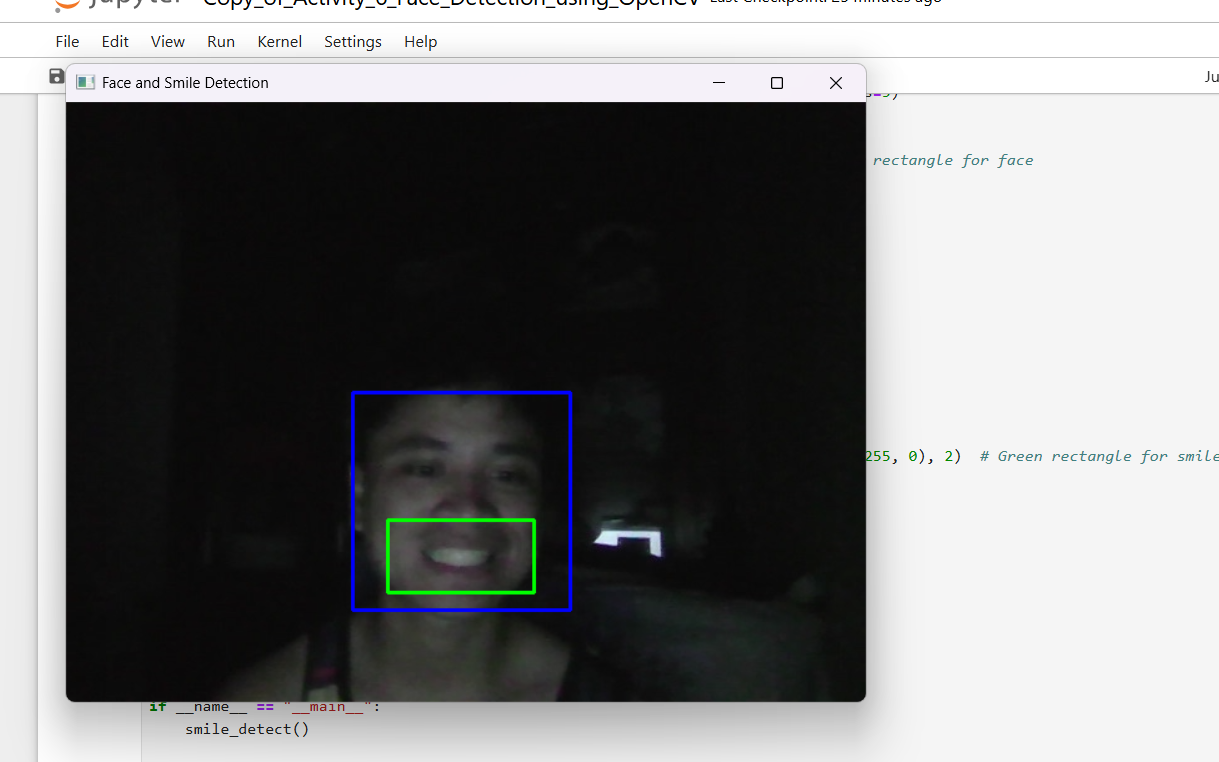
|

## 5. Summary, Conclusions and Lessons Learned

This activity focused on face detection using OpenCV and Haar cascades, allowing me to detect faces in images and videos. I explored how OpenCV simplifies facial recognition and applied it to detect eyes and smiles in real-time webcam feeds. I learned that Haar cascades are effective but somewhat outdated, with newer methods available

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*